<a href="https://colab.research.google.com/github/SeunghyeChae/CAKD3_tmdhey/blob/main/%EA%B3%BC%EB%8C%80%EC%A0%81%ED%95%A9_%EA%B3%BC%EC%86%8C%EC%A0%81%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import models

from tensorflow.keras import layers

original_model = models.Sequential()

original_model.add(layers.Dense(16, activation='relu',input_shape = (10000,)))
original_model.add(layers.Dense(16,activation='relu'))
original_model.add(layers.Dense(1,activation='sigmoid'))
original_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
from tensorflow.keras import models

from tensorflow.keras import layers

smaller_model = models.Sequential()

smaller_model.add(layers.Dense(6, activation='relu',input_shape = (10000,)))
smaller_model.add(layers.Dense(6,activation='relu'))
smaller_model.add(layers.Dense(1,activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
original_hist= original_model.fit(x_train, y_train, epochs=20,
                                  batch_size=512,
                                  validation_data=(x_test,y_test))


Epoch 1/20
49/49 [==============================] - 4s 43ms/step - loss: 0.4539 - accuracy: 0.8232 - val_loss: 0.3566 - val_accuracy: 0.8632
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2601 - accuracy: 0.9086 - val_loss: 0.2953 - val_accuracy: 0.8821
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2015 - accuracy: 0.9279 - val_loss: 0.3026 - val_accuracy: 0.8780
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1698 - accuracy: 0.9392 - val_loss: 0.2897 - val_accuracy: 0.8859
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1446 - accuracy: 0.9500 - val_loss: 0.3068 - val_accuracy: 0.8810
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1280 - accuracy: 0.9552 - val_loss: 0.3277 - val_accuracy: 0.8772
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1131 - accuracy: 0.9621 - val_loss: 0.3697 - val_accuracy: 0.8687
Epoch 8/20
49

In [ ]:
smaller_hist= smaller_model.fit(x_train, y_train, epochs=20,
                                  batch_size=512,
                                  validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 40ms/step - loss: 0.5122 - accuracy: 0.8140 - val_loss: 0.4023 - val_accuracy: 0.8693
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3176 - accuracy: 0.9000 - val_loss: 0.3186 - val_accuracy: 0.8830
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2398 - accuracy: 0.9191 - val_loss: 0.2846 - val_accuracy: 0.8898
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1984 - accuracy: 0.9318 - val_loss: 0.2782 - val_accuracy: 0.8892
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1728 - accuracy: 0.9387 - val_loss: 0.2832 - val_accuracy: 0.8867
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1537 - accuracy: 0.9460 - val_loss: 0.2925 - val_accuracy: 0.8834
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1376 - accuracy: 0.9532 - val_loss: 0.3193 - val_accuracy: 0.8762
Epoch 8/20
49

In [ ]:
epochs= range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_hist.history['val_loss']


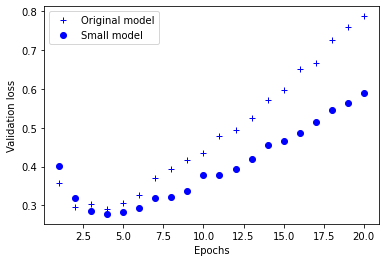

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label= 'Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Small model' )
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [ ]:

bigger_model = models.Sequential()

bigger_model.add(layers.Dense(1024, activation='relu',input_shape = (10000,)))
bigger_model.add(layers.Dense(1024,activation='relu'))
bigger_model.add(layers.Dense(1,activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])


In [ ]:
bigger_hist= bigger_model.fit(x_train, y_train, epochs=20,
                                  batch_size=512,
                                  validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 38ms/step - loss: 0.5457 - accuracy: 0.8126 - val_loss: 0.3820 - val_accuracy: 0.8330
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2238 - accuracy: 0.9110 - val_loss: 0.3484 - val_accuracy: 0.8575
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1225 - accuracy: 0.9570 - val_loss: 0.4522 - val_accuracy: 0.8489
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0835 - accuracy: 0.9821 - val_loss: 0.4679 - val_accuracy: 0.8813
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.0900 - accuracy: 0.9905 - val_loss: 1.1656 - val_accuracy: 0.7963
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.6570 - val_accuracy: 0.8828
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 6.4390e-05 - accuracy: 1.0000 - val_loss: 0.8265 - val_accuracy: 0.8777
Epoch 8/2

In [ ]:
bigger_model_val_loss = bigger_hist.history['val_loss']

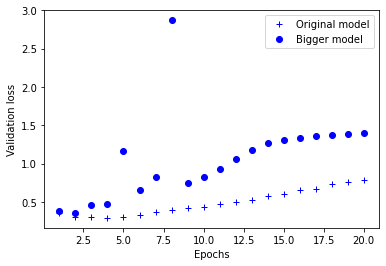

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label= 'Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model' )
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

# 큰 모델이 더 과대적합이 빨리 일어남

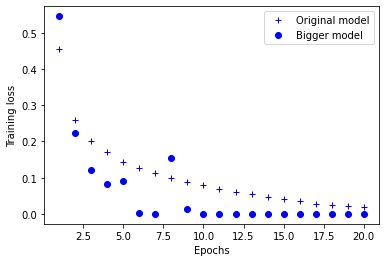

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_train_loss= bigger_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+',label='Original model')
plt.plot(epochs, bigger_train_loss, 'bo', label= 'Bigger model')

plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.show()

 용량이 큰 네트워크는 훈련 손실이 빠르게 0에 가까워진다. 용량이 많은 네트워크일수록 더 빠르게 훈련 데이터를 모델링 할 수 있어서 훈련 손실이 낮아진다. 하지만 더욱 과대적합에 민감해진다. (훈련과 검증 손실 사이에 큰 차이가 발생)

In [ ]:
# 레이어마다 가중치 있어서 레이어 늘면 가중치가 늘어난다.
# 파라미터 

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16,kernel_regularizer = regularizers.l2(0.001),
                       activation='relu',input_shape=(10000,)))
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
l2_model.add(layers.Dense(1,activation='sigmoid'))


In [ ]:
l2_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
l2_model_hist = l2_model.fit(x_train,y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 35ms/step - loss: 0.5125 - accuracy: 0.8232 - val_loss: 0.4050 - val_accuracy: 0.8743
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3351 - accuracy: 0.9022 - val_loss: 0.3482 - val_accuracy: 0.8856
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2847 - accuracy: 0.9169 - val_loss: 0.3409 - val_accuracy: 0.8851
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2640 - accuracy: 0.9242 - val_loss: 0.3375 - val_accuracy: 0.8857
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2514 - accuracy: 0.9302 - val_loss: 0.3391 - val_accuracy: 0.8853
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2400 - accuracy: 0.9351 - val_loss: 0.3558 - val_accuracy: 0.8801
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2346 - accuracy: 0.9356 - val_loss: 0.3599 - val_accuracy: 0.8781
Epoch 8/20
49

In [ ]:
l2_model_val_loss= l2_model_hist.history['val_loss']

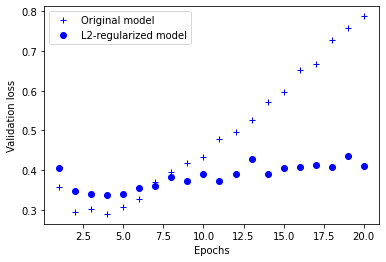

In [ ]:
plt.plot(epochs,original_val_loss,'b+',label='Original model')
plt.plot(epochs,l2_model_val_loss, 'bo', label='L2-regularized model' )
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

모델이 동일한 파라미터 수를 가지고 있더라도 L2규제를 사용한 모델이 기본 모델보다 훨씬 더 과대적합에 잘 견디고 있음

In [ ]:
# [과제] l1규제(0.001) 모델과 비교 

In [ ]:
# 드롭아웃 

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5)) # 드롭아웃은 레이어 단계별로 해주어야함
dpt_model.add(layers.Dense(16,activation='relu'))
dpt_model.add(layers.Dropout(0.5)) 
dpt_model.add(layers.Dense(1,activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss= 'binary_crossentropy',
                  metrics=['accuracy'])


In [ ]:
dpt_model_hist= dpt_model.fit(x_train,y_train,
                              epochs=20,
                              batch_size= 512,
                              validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 35ms/step - loss: 0.5861 - accuracy: 0.6940 - val_loss: 0.4461 - val_accuracy: 0.8626
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.4326 - accuracy: 0.8247 - val_loss: 0.3504 - val_accuracy: 0.8726
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3475 - accuracy: 0.8708 - val_loss: 0.2909 - val_accuracy: 0.8885
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2956 - accuracy: 0.8979 - val_loss: 0.2790 - val_accuracy: 0.8893
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2530 - accuracy: 0.9144 - val_loss: 0.2796 - val_accuracy: 0.8882
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2230 - accuracy: 0.9266 - val_loss: 0.2962 - val_accuracy: 0.8873
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1909 - accuracy: 0.9374 - val_loss: 0.3281 - val_accuracy: 0.8842
Epoch 8/20
49

In [ ]:
dpt_model_val_loss= dpt_model_hist.history['val_loss']

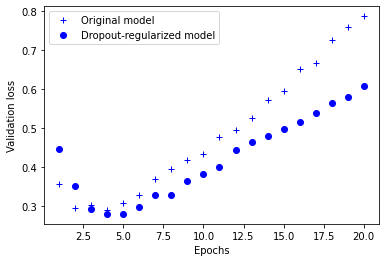

In [ ]:
plt.plot(epochs,original_val_loss,'b+',label='Original model')
plt.plot(epochs,dpt_model_val_loss, 'bo', label='Dropout-regularized model' )
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

신경망에서 과대적합을 방지하기 위한 방법
- 훈련 데이터를 더 모은다.
- 네트워크의 용량을 감소시킨다.(레이어 수, 유닛 수)
- 가중치 규제를 추가한다. (L1, L2)
- 드롭아웃을 추가한다.